# SVM on Emotions Dataset

## Importing The Dataset

In [10]:
import pandas as pd
df = pd.read_csv('emotions.csv')
display(df.head())
print(df.shape)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


(416809, 2)


## Exploring The Data

In [11]:
import matplotlib.pyplot as plt
# Checking data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB
None


In [12]:
# Checking the shape
print("\nDataFrame Shape:", df.shape)


DataFrame Shape: (416809, 2)



Label Value Counts:
 label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64


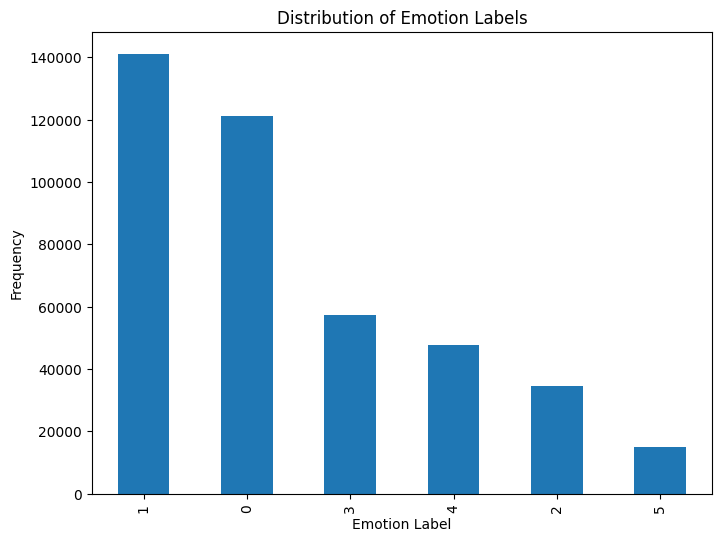

In [13]:
# Analyzing the 'label' column
print("\nLabel Value Counts:\n", df['label'].value_counts())
df['label'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion Label')
plt.ylabel('Frequency')
plt.show()


Text Length Statistics:
Average: 97.02839669968739
Minimum: 2
Maximum: 830


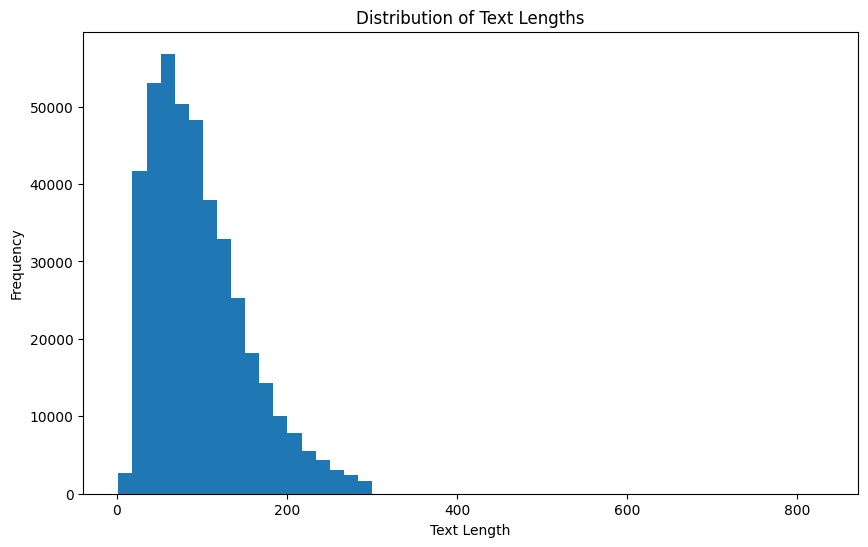

In [14]:
# Analyzing the 'text' column
df['text_length'] = df['text'].str.len()
print("\nText Length Statistics:")
print("Average:", df['text_length'].mean())
print("Minimum:", df['text_length'].min())
print("Maximum:", df['text_length'].max())
df['text_length'].plot(kind='hist', bins=50, figsize=(10, 6))
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Checking for missing values
print("\nMissing Values per Column:\n", df.isnull().sum())


Missing Values per Column:
 text           0
label          0
text_length    0
dtype: int64


## Data Preperation
Preparing the data for model training by converting the text data into numerical features, and scaling the numerical features.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Text Vectorization
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Target Variable Preparation
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Checking unique values in y_train (optional)
print(f"Unique values in y_train: {y_train.unique()}")

# Feature Scaling
scaler = StandardScaler(with_mean=False) #StandardScaler doesn't support sparse matrix with_mean=True
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

Unique values in y_train: [0 1 3 4 2 5]


## Model Training
Training a Support Vector Machine (SVM) classifier on the prepared training data.

In [17]:
from sklearn.svm import LinearSVC

# Initialize the LinearSVC model
svm_model = LinearSVC(dual=False, C=1.0)

# Train the model
svm_model.fit(X_train_scaled, y_train)

LinearSVC(dual=False)

## Evaluating The Model

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8984429356301432
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24201
           1       0.92      0.92      0.92     28164
           2       0.79      0.78      0.79      6929
           3       0.91      0.91      0.91     11441
           4       0.85      0.84      0.85      9594
           5       0.73      0.70      0.71      3033

    accuracy                           0.90     83362
   macro avg       0.86      0.85      0.85     83362
weighted avg       0.90      0.90      0.90     83362



In [19]:
# Preprocess the new text data
new_text = ["I hate my friend."]
new_text_tfidf = tfidf_vectorizer.transform(new_text)
new_text_scaled = scaler.transform(new_text_tfidf)

# Predict the emotion
predicted_emotion = svm_model.predict(new_text_scaled)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: [3]


Label	Emotion

0	sadness

1	joy

2	love

3	anger

4	fear

5	surprise

